### Implementing the simple linear regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)


In [3]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
df.shape

(237, 4)

In [9]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values


In [11]:
mean_x = np.mean(X)
mean_y = np.mean(Y)


In [12]:
n = len(X)

In [18]:
numer = 0 
denom = 0

for i in range(n):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2

b1 = numer/denom
b0 = mean_y -(b1 * mean_x)
print(b0,b1)

325.57342104944223 0.26342933948939945


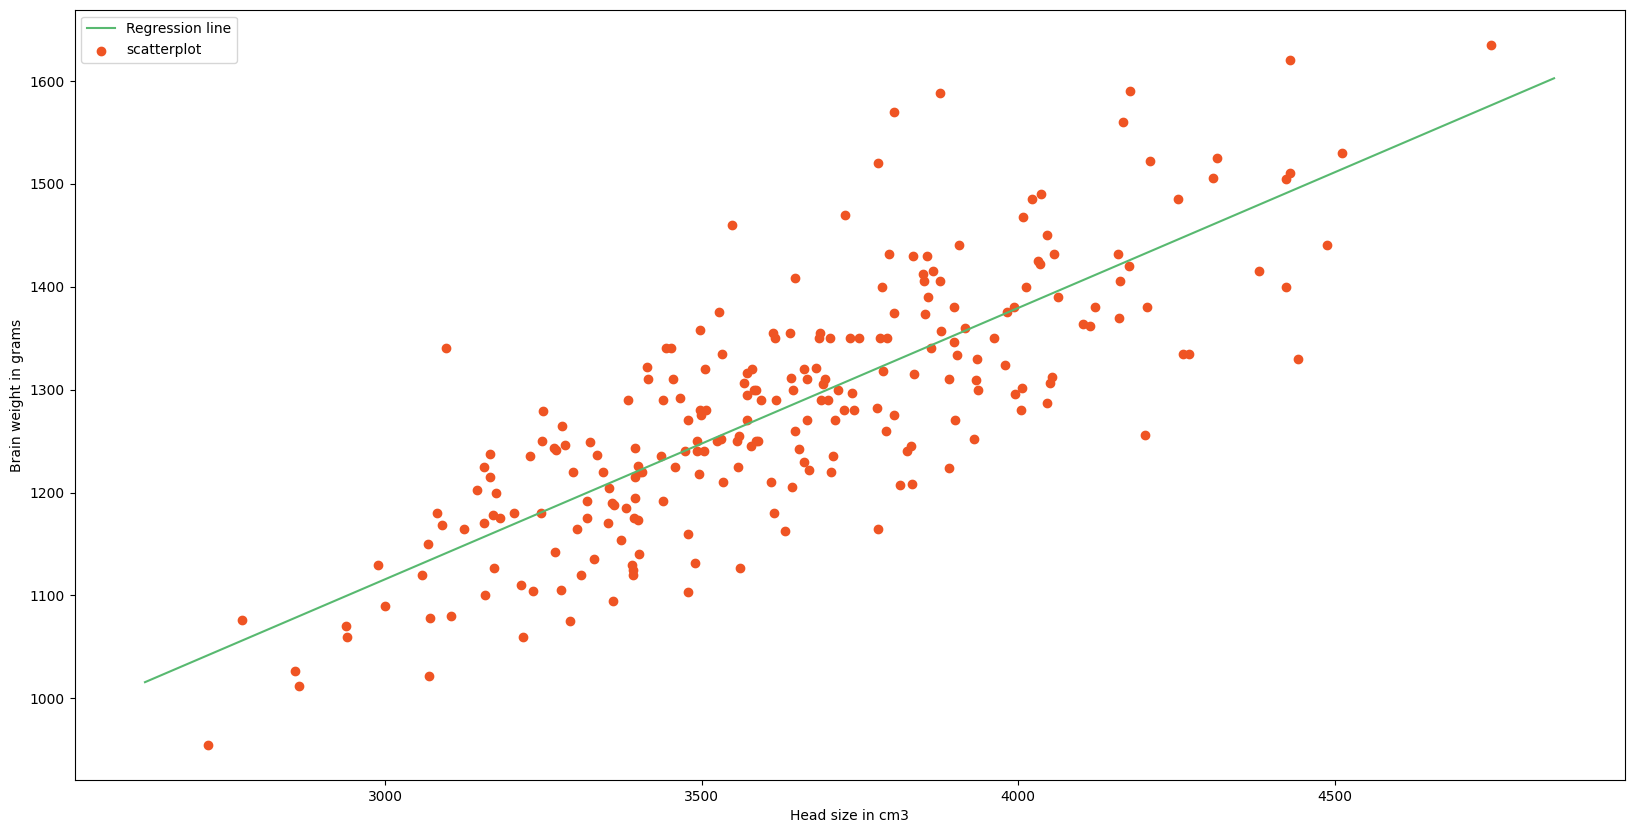

In [19]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x,max_x,1000)
y = b0 +(b1*x)
plt.plot(x,y,color = '#58b970',label = 'Regression line')
plt.scatter(X,Y,c='#ef5423', label = 'scatterplot')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [20]:
# calculating r2 value for the model
ss_t = 0
ss_r =0
for i in range(n):
    y_pred = b0 + (b1 * X[i])
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i]-y_pred)**2

r2 = 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# cannot use matrix with rank 1 in scikit learn
X =X.reshape((n,1))
reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)


In [22]:
r2 = reg.score(X,Y)

In [23]:
r2

0.639311719957

### Implementing multiple linear regression

In [24]:
import seaborn as sns
%matplotlib inline


In [25]:
df = pd.read_csv('1000_Companies.csv')
X = df.iloc[:,:-1].values
Y = df.iloc[:,4].values

In [26]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

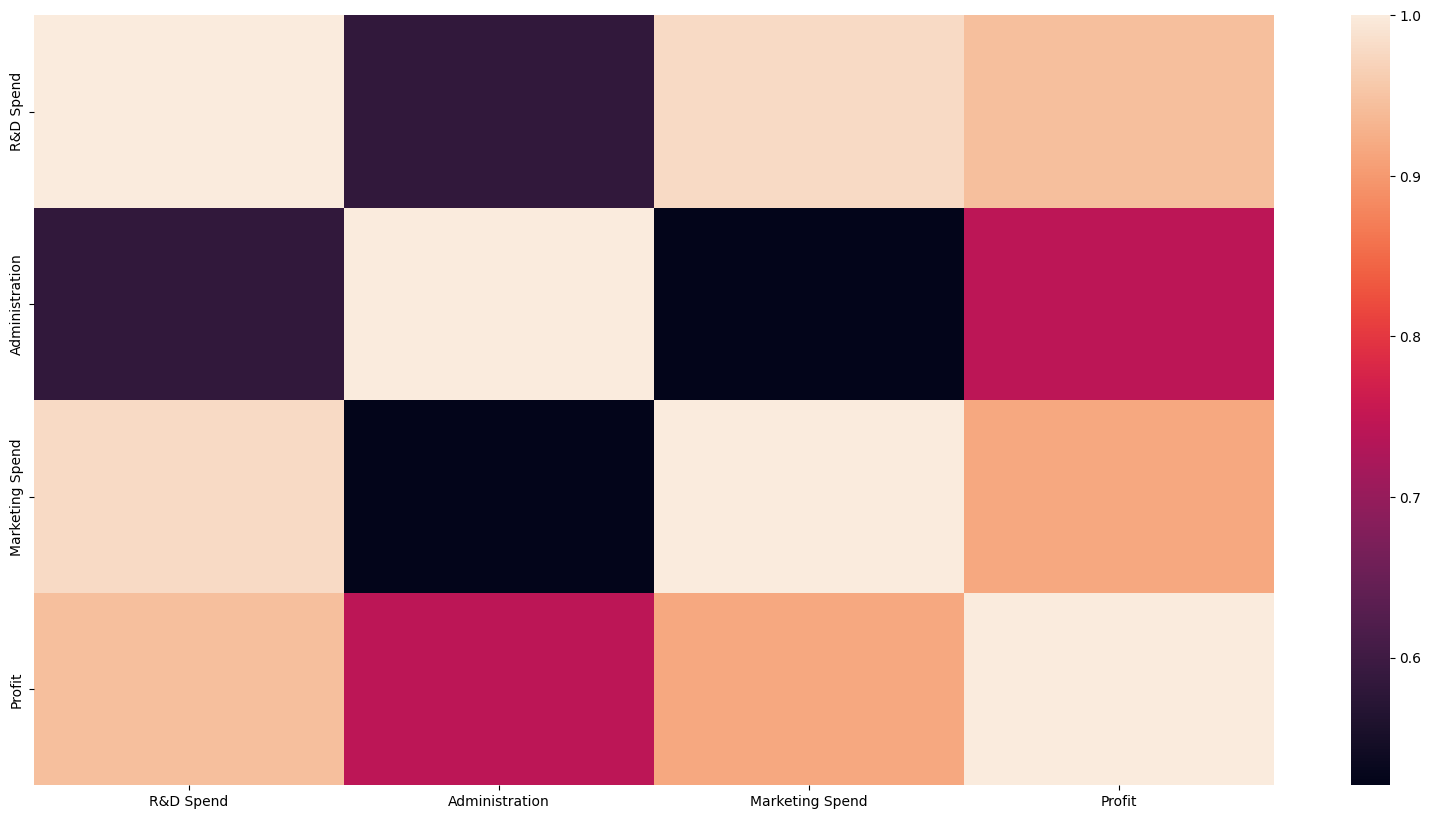

In [29]:
# building the correlation matrix 
sns.heatmap(df.drop('State',axis=1).corr())

In [30]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [31]:
# encoding 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

In [32]:
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       ...,
       [100275.47, 241926.31, 227142.82, 0],
       [128456.23, 321652.14, 281692.32, 0],
       [161181.72, 270939.86, 295442.17, 2]], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer
# Specify which columns to one-hot encode by using the 'transformers' list
# In this example, we assume that column 3 should be one-hot encoded
# You can specify more columns as needed
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [3])  # [3] is the index of the column to one-hot encode
    ],
    remainder='passthrough'  # You can choose to pass through other columns as is
)

# Fit and transform your data
X_encoded = column_transformer.fit_transform(X)


In [36]:
print(X_encoded)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 100275.47 241926.31 227142.82]
 [1.0 0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 0.0 1.0 161181.72 270939.86 295442.17]]


In [37]:
X_encod = X_encoded[:,1:]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_encod,Y,test_size=0.2,random_state=0)

In [40]:
regr = LinearRegression()
regr = regr.fit(x_train,y_train)

In [41]:
regr

LinearRegression()

In [42]:
y_pred = regr.predict(x_test)

In [44]:
print(regr.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [45]:
print(regr.intercept_)

-51035.22972404538


In [48]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.8887778837897241

### Another way of implementing multiple linear regression
same as above, only a small difference in encoding

In [49]:
df = pd.read_csv('1000_Companies.csv')

In [50]:
X = df.iloc[:,:-1]
y = df.iloc[:,4]


In [53]:
states = pd.get_dummies(X['State'],drop_first=True).astype(int)

In [55]:
X = X.drop('State', axis = 1)

In [56]:
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.800,471784.1000
1,162597.70,151377.590,443898.5300
2,153441.51,101145.550,407934.5400
3,144372.41,118671.850,383199.6200
4,142107.34,91391.770,366168.4200
...,...,...,...
995,54135.00,118451.999,173232.6695
996,134970.00,130390.080,329204.0228
997,100275.47,241926.310,227142.8200
998,128456.23,321652.140,281692.3200


In [57]:
X = pd.concat([X,states],axis=1)

In [58]:
X

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.800,471784.1000,0,1
1,162597.70,151377.590,443898.5300,0,0
2,153441.51,101145.550,407934.5400,1,0
3,144372.41,118671.850,383199.6200,0,1
4,142107.34,91391.770,366168.4200,1,0
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,0
996,134970.00,130390.080,329204.0228,0,0
997,100275.47,241926.310,227142.8200,0,0
998,128456.23,321652.140,281692.3200,0,0


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [62]:
regr = LinearRegression()
regr = regr.fit(x_train,y_train)

In [63]:
y_pred = regr.predict(x_test)

In [64]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.8887778837896706

In [65]:
print(regr.coef_)

[ 5.25845857e-01  8.44390881e-01  1.07574255e-01 -8.80536598e+02
 -6.98169073e+02]


In [66]:
print(regr.intercept_)

-51035.22972402483
